In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ip=pd.read_csv('haberman.csv')
ip.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [4]:
ip.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


From the above we can say that 
- The minimum age of patient is 30 and maximum age is 83
- The minimum number of nodes is 0 where as maximum number of nodes are 52
- The time of recording this data was from 1958 to 1969

In [5]:
    ip.shape

(306, 4)

In [6]:
ip.size

1224

In [7]:
ip.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

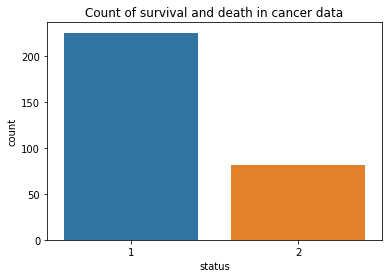

In [8]:
sns.countplot(x='status',data=ip)
plt.title('Count of survival and death in cancer data')
plt.show()

What we can observe from above plot is that 
- There are more number of surviours than deaths.

C:\Users\rohith\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


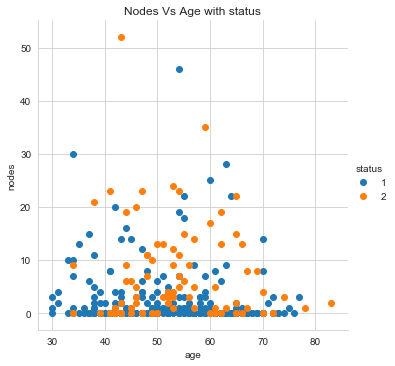

In [9]:
sns.set_style('whitegrid')
sns.FacetGrid(ip,hue='status',size=5).map(plt.scatter,'age','nodes').add_legend()
plt.title('Nodes Vs Age with status')
plt.show()

Here we can observe that 
- A large number of people have nodes less than 10.
- People with age from 30 to 40 have low mortality rate when compared with other age groups and people above 80 cannot survive the cancer.
- The age from 40 to 70 tends to more fatal (ofcourse there are also survivals) as more deaths are recorded within 5 years of surgery
- There are very few cases recorded above 70 and as per the data people above 80 died within 5 years of the surgery (there is only one recoding)
- It's not clear as most of the opints are overlapping.
Lets explore more

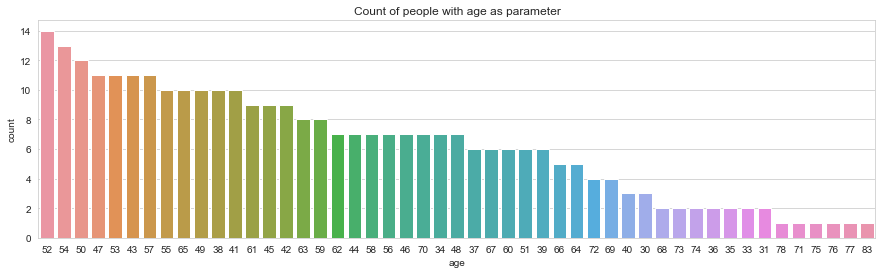

In [10]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='age',data=ip,order=ip['age'].value_counts().index)
plt.title('Count of people with age as parameter')
plt.show()

We can see that 
- Majority portion of the people belongs to 40's and 50's.
- There are very few people in their 70's

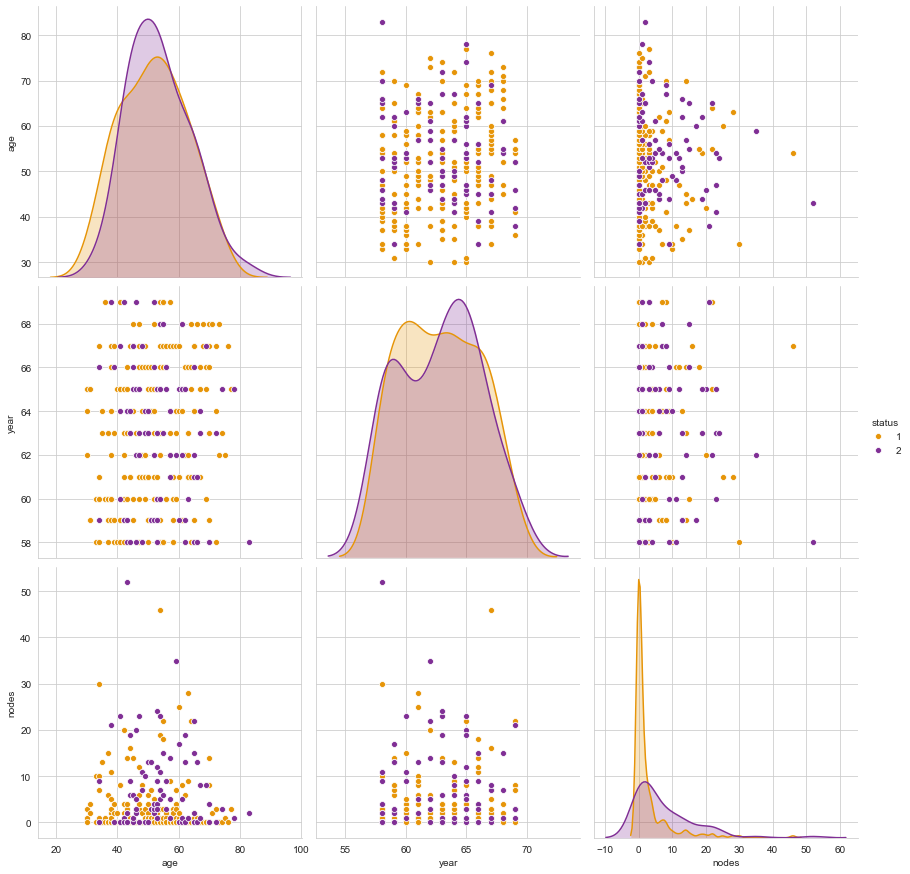

In [11]:
sns.set_style('whitegrid')
sns.pairplot(ip,hue='status',palette='CMRmap_r',vars=['age','year','nodes'],height=4)
plt.show()

From the pair plot we can observe that 
- age,nodes looks like determinig factors

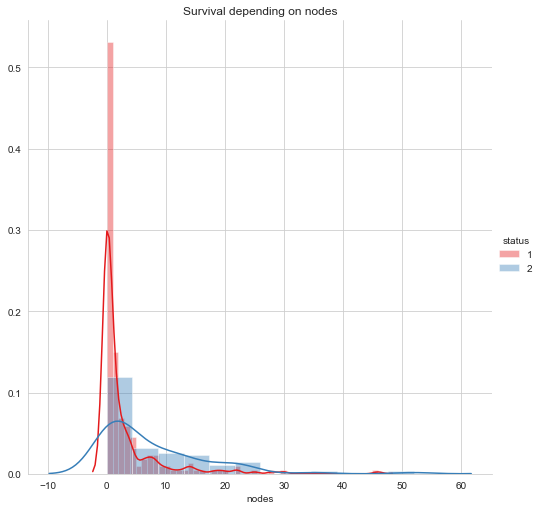

In [12]:
#univariate analysis
sns.set_style('whitegrid')
sns.FacetGrid(ip,hue='status',palette='Set1',height=7).map(sns.distplot,'nodes').add_legend()
plt.title('Survival depending on nodes')
plt.show()

We can note that
- People with 0 nodes lived more than 5 years.
- While the number of nodes increased the survival rate decreased and fatality rate increased.The more the nodes the less the chance of survival.
- We can clearly tell that the fewer the nodes the more chance of survival.

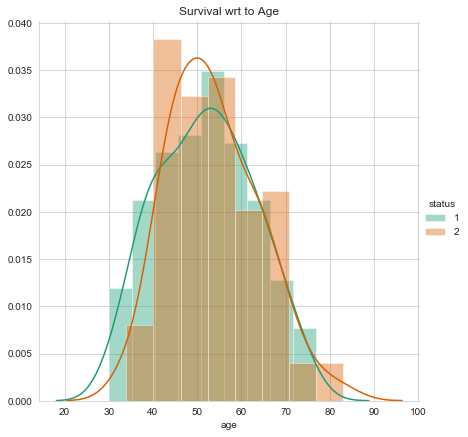

In [13]:
sns.set_style('whitegrid')
sns.FacetGrid(ip,hue='status',palette='Dark2',height=6).map(sns.distplot,'age').add_legend()
plt.title('Survival wrt to Age')
plt.show()

From the above figure
- People in their early 30's tends to survive more.
- While those in their 40's,50's,60's and 70's have more death rate within 5 years of the surgery.
- And as drawn an insight from the first scatter plot, people with age above ~75 did not survive.
- There is a moajor overlap of the data which indicates that age does not carry enough data to conclude.

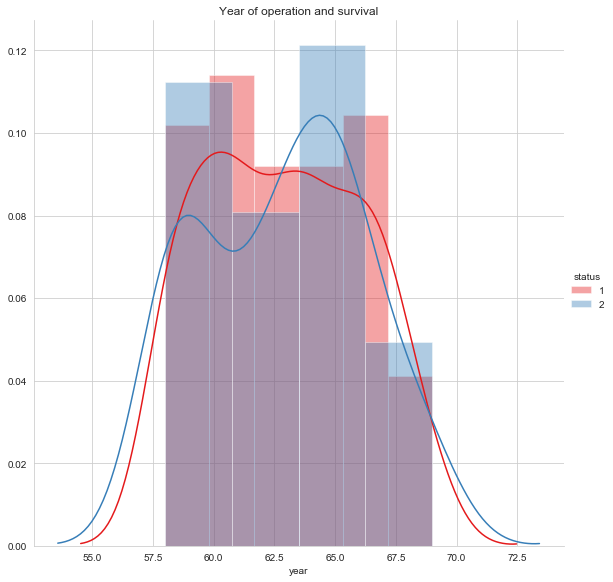

In [14]:
sns.set_style('whitegrid')
sns.FacetGrid(ip,hue='status',palette='Set1',height=8).map(sns.distplot,'year').add_legend()
plt.title('Year of operation and survival')
plt.show()

We can notice that
- The operations made at initial years (~195 record more mortality than survival than later years.There are more failed operations resulting in deaths from around 1961 to 1963.From 1966 to 1967 there is again an increase in deaths.
- Majority of the data is being overlapped.

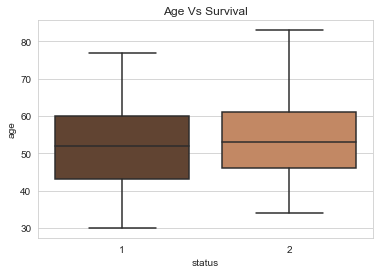

In [28]:
sns.boxplot(x='status',y='age',data=ip,palette='copper')
plt.title('Age Vs Survival')
plt.show()

From boxplot we can observe that
- The majority of the people who survived lies with in age group of around 43 and 60.
- The majority of people who were scumbed to death lies in age group of arount 46 to 61.


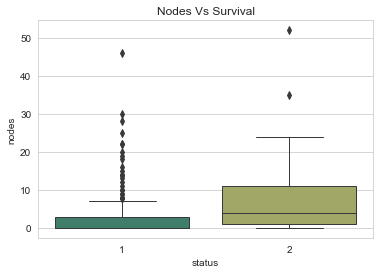

In [29]:
sns.boxplot(x='status',y='nodes',data=ip,linewidth=1,palette='gist_earth')
plt.title('Nodes Vs Survival')
plt.show()

Although looks like outliers
- The 75 percentile of survivers fall below 50th percentile of dead people.

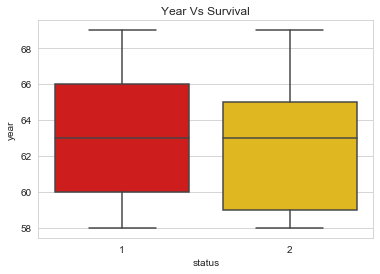

In [30]:
sns.boxplot(x='status',y='year',data=ip,palette='hot')
plt.title('Year Vs Survival')
plt.show()

- The 50th percentiles or medians of both survived and dead looks like very close.
- 50 percentile of the dead people are those who got operaqted from '56 to around '63.


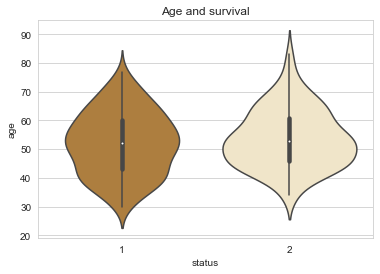

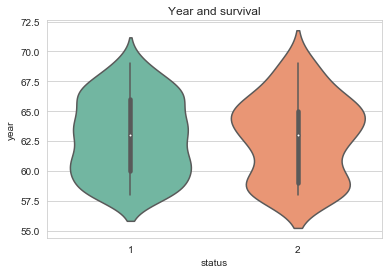

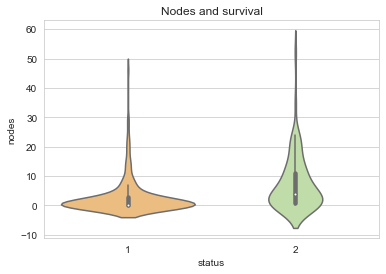

In [18]:

sns.violinplot(x='status',y='age',data=ip,palette=sns.color_palette('BrBG',4))
plt.title('Age and survival')
plt.show()

sns.violinplot(x='status',y='year',data=ip,palette='Set2')
plt.title('Year and survival')
plt.show()

sns.violinplot(x='status',y='nodes',data=ip,palette='Spectral')
plt.title('Nodes and survival')
plt.show()

From the above violin charts we can observe that
- The deaths peaked for people in their mid 40's and 50's.
- People who got operated during '59 and '60 have survived more while those who got operated during mid of 1962 to 1965 have seen an exponential rise in deaths.
- The operations done from mid of 1957 to around 1958 tends to have raise in number of deaths and then the death rate raised again from mid of 1962 to around 1964
- A majority of people with 0 and 1 node have survived while few of them died with in 5 years despite undergoing a surgery.
- A mojor portion of the people are in age group mid 40's to their 60's.
- With the increase in no:of nodes the survival rate decreased significantly while few people survived even with more number of nodes.
- I think it is almost impossible to set a treshold for age,year with survival as most of the data overlaps with each other.

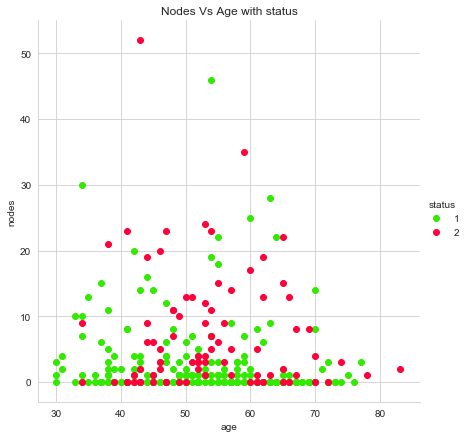

In [19]:
sns.set_style('whitegrid')
sns.FacetGrid(ip,hue='status',height=6,palette='prism').map(plt.scatter,'age','nodes').add_legend()
plt.title('Nodes Vs Age with status')
plt.show()

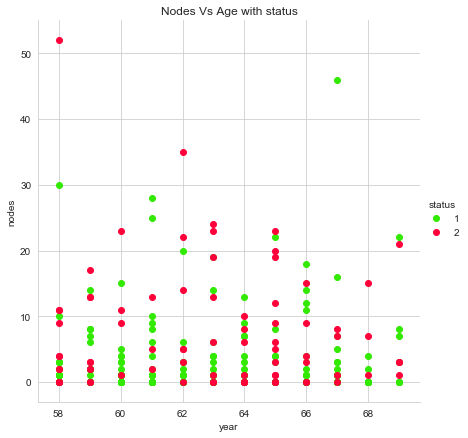

In [20]:
sns.set_style('whitegrid')
sns.FacetGrid(ip,hue='status',height=6,palette='prism').map(plt.scatter,'year','nodes').add_legend()
plt.title('Nodes Vs Age with status')
plt.show()

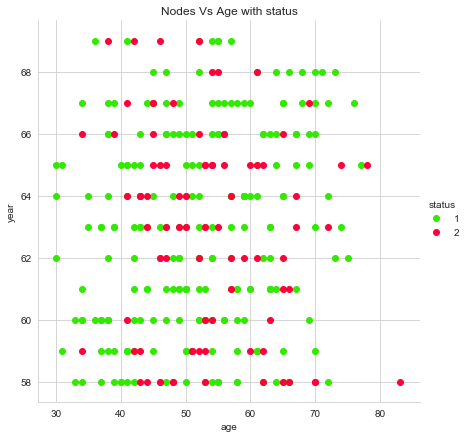

In [21]:
sns.set_style('whitegrid')
sns.FacetGrid(ip,hue='status',height=6,palette='prism').map(plt.scatter,'age','year').add_legend()
plt.title('Nodes Vs Age with status')
plt.show()

Here we can observe that 
- A large number of people have nodes less than 10.
- People with age from 30 to 40 have significantly low mortality rate when compared with other age groups and people above 80 cannot survive the cancer.
- The age from 40 to 70 tends to more fatal (ofcourse there are also survivals) as more deaths are recorded within 5 years of surgery
- There are very few cases recorded above 70 and as per the data and people above 80 died within 5 years of the surgery (there is only one recoding)
- There are more people with age 40 to 60.
- Very few patients have nodes greater than 20.

### As the classes cannot be seperated easily because of overlapping I am seperating survived and dead classes seperatly.


In [22]:
survived=ip.loc[ip['status']==1]
dead= ip.loc[ip['status']==2]

In [23]:
survived.describe()

,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [24]:
dead.describe()

,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


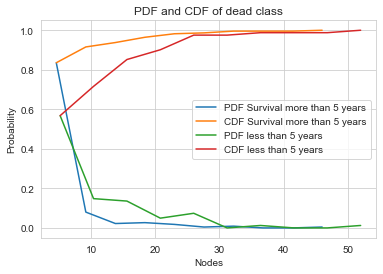

In [25]:
counts, bin_edges = np.histogram(survived['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF Survival more than 5 years')
plt.plot(bin_edges[1:],cdf,label='CDF Survival more than 5 years')
plt.title('PDF and CDF of survived class')
plt.xlabel('Nodes')
plt.ylabel('Probability')
plt.legend()

counts2,bin_edges2=np.histogram(dead['nodes'],bins=10,density=True)
pdf2 = counts2/(sum(counts2))
print(pdf2);
print(bin_edges2);
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:],pdf2,label='PDF less than 5 years');
plt.plot(bin_edges2[1:], cdf2,label='CDF less than 5 years')
plt.title('PDF and CDF of dead class')
plt.xlabel('Nodes')
plt.ylabel('Probability')
plt.legend()

It can be infered that 
- About around 85% of people who have nodes < 5 survived.As number of nodes increases the chance of survial decreased.Death is iminent to the people having nodes >35.
- We can also see that 96% of people have nodes <= 20.
- 55% probability those have nodes<5 have survived less than 5 years.
- About 85% of the people died within 5 years of the surgery with  5<nodes<20.

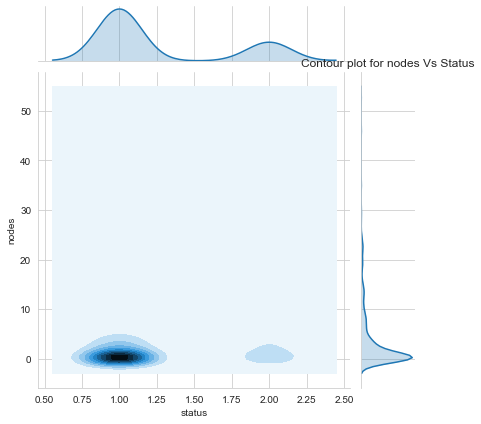

In [26]:
sns.jointplot(x='status',y='nodes',data=ip,kind='kde')
plt.title('Contour plot for nodes Vs Status')
plt.show()

- There is lot of densiy vesting at nodes 0 and less than 5 hence it can be concludes that majority of survived class peple have nodes leass than 5.

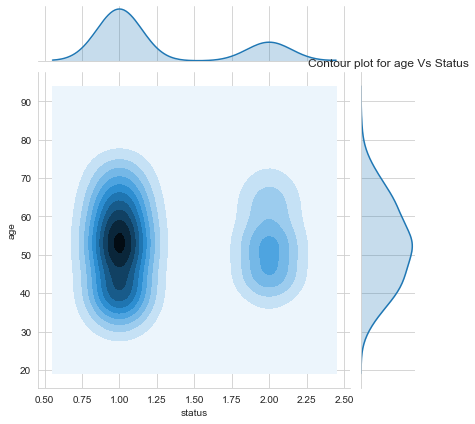

In [27]:
sns.jointplot(y='age',x='status',data=ip,kind='kde')
plt.title('Contour plot for age Vs Status')
plt.show()

From the above picture
- More number of people died in the age group of 45 to early 50's.
- Majority of the patients are aged 40 to 60 andespecially the density is higher from 50 to around 54 hence more number of people are present in this age group followed by mid 40's to late 50's and so on.


### Conclusion:

- The given data is not linearly seperable as it have overlaping of data points.
- Upon the analysis we can conclude that number of nodes is the most determining factor for the survival rate regard less of the year operated.Age in assosiation can also be used but only with more valid data.